In [5]:
from matplotlib import pyplot as plt

In [2]:
def parse_csv(file_name):
    data = {}
    cur_data = None
    with open(file_name) as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            if line.startswith("ultrasound"):  # New sensor
                sensor_name = line[len("ultrasound"):]
                data[sensor_name] = []
                cur_data = data[sensor_name]
                continue
            line_parts = line.split(",")
            assert len(line_parts) == 2
            if line_parts[0] == "time" and line_parts[1] == "distance":  # correct header
                continue
            time_stamp = float(line_parts[0])
            distance = float(line_parts[1])
            cur_data.append((time_stamp, distance))
    return data

In [3]:
data = parse_csv("test.csv")

In [11]:
def plot_data(data):
    for name, plt_data in data.items():
        x_vals = [d[0] for d in plt_data]
        y_vals = [d[1] for d in plt_data]
        plt.plot(x_vals, y_vals, label=name)
    plt.legend()

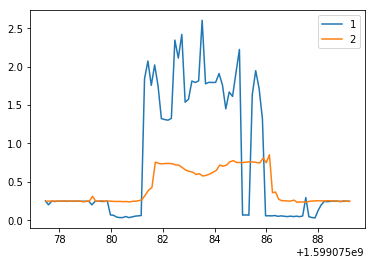

In [12]:
plot_data(data)